In [987]:
import importlib

import Qint
import Bint
import numpy as np
import Qcontrol
import preparation
from functools import partial
import matplotlib.pyplot as plt

importlib.reload(Bint)
importlib.reload(Qint)
importlib.reload(Qcontrol)
importlib.reload(preparation)


from Bint import BinaryInt
from Qint import *
from Qcontrol import *
from preparation import *

In [988]:
lst = [1,2,3,4,5]
length = 8
module = 20
amps = np.zeros(2**length, dtype=np.complex128)
amps[:len(lst)] = np.repeat(1/np.sqrt(len(lst))*1j, len(lst))

qint = Qint(lst, amps, module, length)
print(qint)

0.4472135954999579j → 00000001
0.4472135954999579j → 00000010
0.4472135954999579j → 00000011
0.4472135954999579j → 00000100
0j → 00000101



In [989]:
module = 100
length = 10
a = BinaryInt(5, length)
print(a)
b = BinaryInt(95, length)
c = a+b
print(c)

0000000101
0001100100


In [990]:
qc = 1
lst = [1,2,3,4,5]
length = 8
module = 20
amps = np.zeros(2**length, dtype=np.complex128)
amps[:len(lst)] = np.repeat(1/np.sqrt(len(lst))*1j, len(lst))

qt = Qint(lst, amps, module, length)
offset = 1

print(qt)
print("==")
qr = controlled_by(qc, qt, offset, BinaryInt.__add__)
print(qr)

0.4472135954999579j → 00000001
0.4472135954999579j → 00000010
0.4472135954999579j → 00000011
0.4472135954999579j → 00000100
0j → 00000101

==
0.4472135954999579j → 00000010
0.4472135954999579j → 00000011
0.4472135954999579j → 00000100
0j → 00000101
0j → 00000110



In [991]:
qc = Qcontrol.qalloc(1, "X")
lst = [1,3,5]
length = 8
module = 50
amps = np.zeros(2**length, dtype=np.complex128)
amps[lst] = np.repeat(1/np.sqrt(len(lst))*1j, len(lst))

qt = Qint(lst, amps, module, length)
offset = [0, 2]

print(qt)
print("==")
qr = controlled_by(qc, qt, offset, partial(Bint.modular_add, N = qt.module))
print(qr)

0.5773502691896258j → 00000001
0.5773502691896258j → 00000011
0.5773502691896258j → 00000101

==
0.408248290463863j → 0|00000001
0.408248290463863j → 0|00000011
0.408248290463863j → 0|00000101
0.408248290463863j → 1|00000011
0.408248290463863j → 1|00000101
0.408248290463863j → 1|00000111



In [992]:
a = Cvalue(21, 8)
print(a)
b = a.pop([0,1,2])
print(b.binary)


00010101
00010


In [993]:
c = a[[1,2,4]]
print(c)
observables = [0,1,1]
print(if_neg(c, observables))

110
-1


In [994]:
b = BinaryInt(6, 3)
print(b)
print(b[[0,1,2]])

110
110


In [995]:
length = 4
values = [0, 8]
module = 2**length
amps = np.zeros(2**length, dtype=np.complex128)
amps[values] = 1/np.sqrt(len(values))
q = Qint(values, amps, module, length)
m = 2
offsets = np.arange(2**m)
print(q)
qr = oblivous_runways(q, m, [length-2, length-1], 2)
print(qr)

(0.7071067811865475+0j) → 0000
(0.7071067811865475+0j) → 1000

(0.3535533905932737+0j) → 000000
(0.3535533905932737+0j) → 100000
(0.3535533905932737+0j) → 101000
(0.3535533905932737+0j) → 001000
(0.3535533905932737+0j) → 110100
(0.3535533905932737+0j) → 010100
(0.3535533905932737+0j) → 011100
(0.3535533905932737+0j) → 111100



(1+0j)
(0.9808607719692055+0j)
(0.9956942897795654+0j)
(0.9989756721468338+0j)


C:\Users\24835\AppData\Local\Temp\ipykernel_26620\3177700492.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
  error[i] = 1- test_oblivious_runways(k, m, m+2)


(0.9997500156230391+0j)
(0.9999382420602291+0j)
(0.999984651335907+0j)


Text(0.5, 0, 'number of runway qubits')

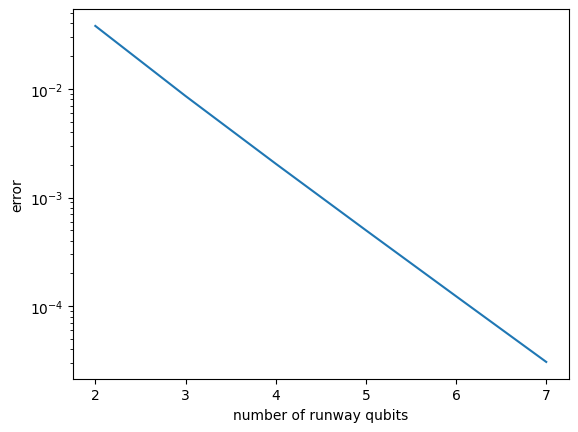

In [997]:
length = 4
values = [0, 8]
module = 2**length-2
amps = np.zeros(2**length, dtype=np.complex128)
amps[values] = 1/np.sqrt(len(values))
q = Qint(values, amps, module, length)
q.update_value(8, 1)
print(q)
a = q+5
print(a)

(0.7071067811865475+0j) → 0000
(0.7071067811865475+0j) → 0001

(0.7071067811865475+0j) → 0101
(0.7071067811865475+0j) → 0110



In [998]:
start = 0
stop = 1
step = 1
print([-1 - i for i in range(start, stop, step)])

[-1]
